In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
np.random.seed(1)  # set the random seed for reproducibility

In [2]:
def data_generate(n=50):
    x = np.random.randn(n, 3)
    x[:n // 2, 0] -= 15
    x[n // 2:, 0] -= 5
    x[1:3, 0] += 10
    x[:, 2] = 1
    y = np.concatenate((np.ones(n // 2), -np.ones(n // 2)))
    index = np.random.permutation(np.arange(n))
    return x[index], y[index]

In [3]:
def shuffle(x, y):
    p = np.random.permutation(np.arange(len(y)))
    return x[p], y[p]

In [4]:
def f(x):
    return - mu[0,0] * x / mu[1,0] - mu[2,0] / mu[1,0]

In [5]:
def update(x, y, mu, sigma):
    hin = max(0, (1 - np.dot(mu.T, x[:, None]) * y)[0][0])
    eps = (1 / (np.dot(np.dot(x[None, :], sigma), x[:, None]) + gamma))[0][0]
    new_sigma = sigma - eps * sigma.dot(x[:, None]).dot(x[None, :]).dot(sigma)
    new_mu = mu + eps * y * hin * np.dot(sigma, x[:, None])
    return new_mu, new_sigma

In [6]:
x, y = data_generate()
mu = np.zeros(3)[:, None]
sigma = np.eye(3)
gamma = 0.1
n_epochs = 10
var_norm = np.empty(n_epochs)

for epoch in range(n_epochs):
    var_norm[epoch] = np.sqrt(np.sum(np.linalg.eig(sigma)[0] ** 2))
    x, y = shuffle(x, y)
    for i in range(len(y)):
        mu, sigma = update(x[i], y[i], mu, sigma)

(-2, 2)

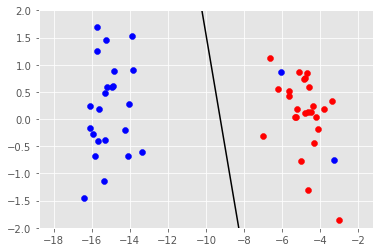

In [7]:
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color = "b")
plt.scatter(x[:, 0][y == -1], x[:, 1][y == -1], color = "r")
plt.plot(np.array([-18, -2]), f(np.array([-18, -2])), color = "black")
plt.ylim(-2,2)

Text(0, 0.5, 'log-eigen-norm')

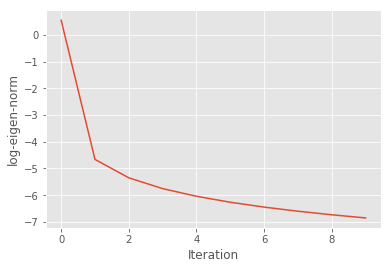

In [8]:
plt.plot(range(n_epochs), np.log(var_norm))
plt.xlabel("Iteration")
plt.ylabel("log-eigen-norm")